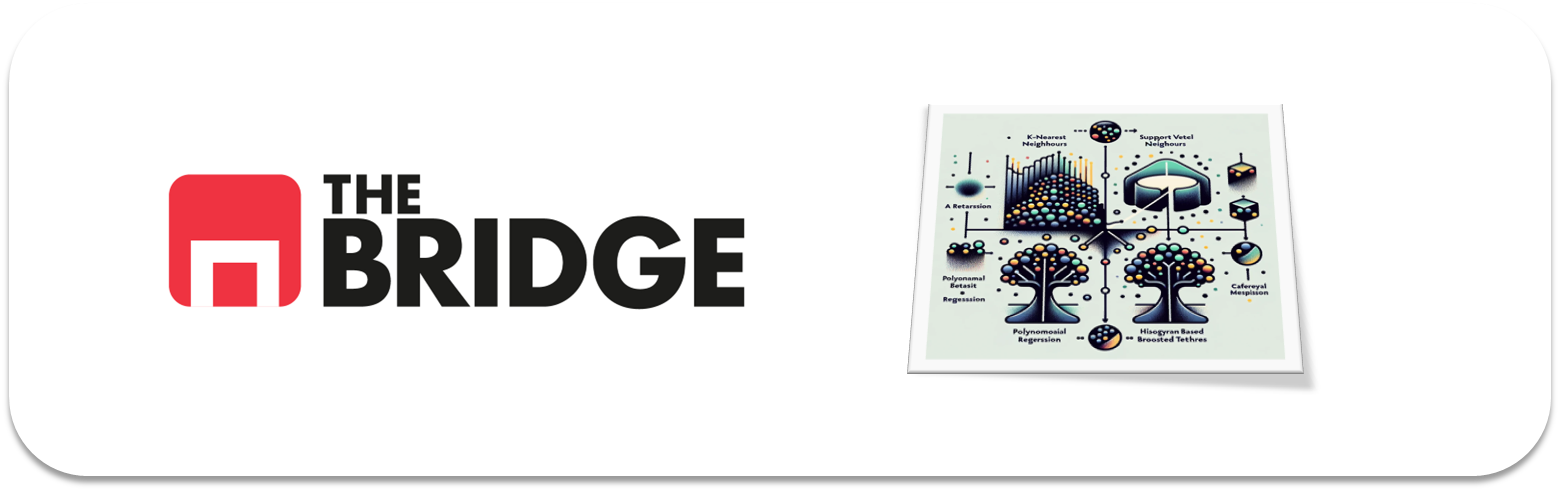

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import xgboost

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df_credit = pd.read_csv('./data/credit_npo.csv')

In [3]:
df_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [4]:
df_credit.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [5]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [6]:
for i in df_credit.columns:
    print(f'Columna {i} q de items ->' ,df_credit[i].nunique())
    print(f'Columna {i} % cardinalidad ->' ,df_credit[i].nunique()/len(df_credit))
    print(f'Columna {i} intervalo de valores ->' ,df_credit[i].min(), '-', df_credit[i].max())
    print()

Columna SeriousDlqin2yrs q de items -> 2
Columna SeriousDlqin2yrs % cardinalidad -> 0.00015952779771875248
Columna SeriousDlqin2yrs intervalo de valores -> 0 - 1

Columna RevolvingUtilizationOfUnsecuredLines q de items -> 10764
Columna RevolvingUtilizationOfUnsecuredLines % cardinalidad -> 0.8585786073223259
Columna RevolvingUtilizationOfUnsecuredLines intervalo de valores -> 0.0 - 6.0

Columna age q de items -> 78
Columna age % cardinalidad -> 0.006221584111031347
Columna age intervalo de valores -> 21 - 101

Columna NumberOfTime30-59DaysPastDueNotWorse q de items -> 10
Columna NumberOfTime30-59DaysPastDueNotWorse % cardinalidad -> 0.0007976389885937624
Columna NumberOfTime30-59DaysPastDueNotWorse intervalo de valores -> 0 - 98

Columna DebtRatio q de items -> 11547
Columna DebtRatio % cardinalidad -> 0.9210337401292176
Columna DebtRatio intervalo de valores -> 0.0 - 99.0

Columna MonthlyIncome q de items -> 4167
Columna MonthlyIncome % cardinalidad -> 0.33237616654702085
Columna Mont

## DEFINICION Y TIPO DE VARIABLES  

.- SeriousDlqin2yrs -> categorica binaria, tiene pinta de target, creo que es deudores en 2 años  

.- RevolvingUtilizationOfUnsecuredLines -> numerica continua, % de credito en lineas de credito no garantizadas, no aval (ej tarjetas de credito)  

.- age -> numerica discreta, edad del user  

.- NumberOfTime30-59DaysPastDueNotWorse -> numerica discreta, q de veces que user ha llegado 30-59 dias de retraso en pago  

.- DebtRatio -> numerica continua, ratio de deuda, en tanto por ciento  

.- MonthlyIncome -> numerica continua, ingresos mensuales  

.- NumberOfOpenCreditLinesAndLoans -> numerica discreta, q de lineas de credito y prestamos abiertos  

.- NumberOfTimes90DaysLate -> numerica discreta, retrass de mas de 90 dias en pago de obligaciones  

.- NumberRealEstateLoansOrLines -> numerica discreta, q de creditos o prestamos relacionados con bienes raices, bienes inmobiliarios  

.- NumberOfTime60-89DaysPastDueNotWorse -> numerica discreta, q de veces que user ha llegado 60-89 dias de retraso en pago  

.- NumberOfDependents -> numerica discreta, q de personas dependientes financieramente  


In [7]:
# todas las columnas son numericas, con pocos valores (dudo si clasificarlas como cateogricas, pero se refieren a cantidad de veces y tal, me decanto por numericas)
# el target es binario, creo que voy a utilizar la regresion logistica como modelo para una baseline

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

problema de clasificacion, target binaria, primera columna, seriousdlquin2yrs

<Axes: ylabel='MonthlyIncome'>

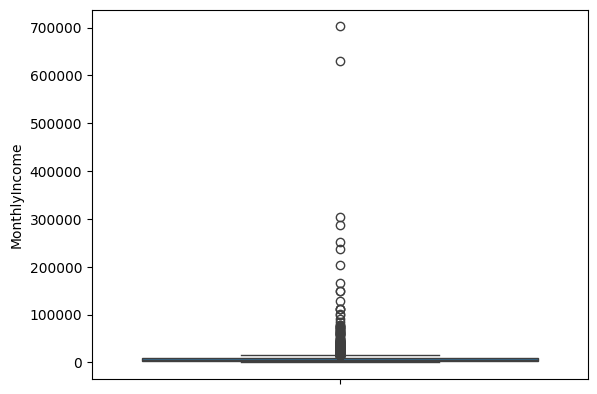

In [8]:
# voy a limpiar el data que contiene nulos

sns.boxplot(df_credit['MonthlyIncome']) # bestialidad de outliers

In [9]:
df_credit['MonthlyIncome'].describe()

count     11816.000000
mean       6864.815420
std       11855.905437
min           0.000000
25%        3498.750000
50%        5416.000000
75%        8300.000000
max      702500.000000
Name: MonthlyIncome, dtype: float64

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

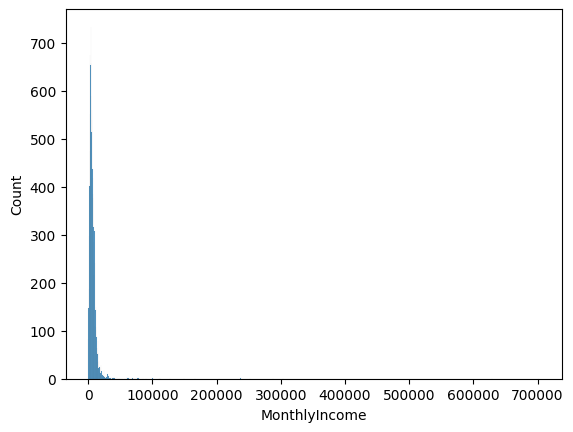

In [10]:
sns.histplot(df_credit['MonthlyIncome']) # menuda cola tu, predecible, voy a sustituir nulos con la mediana

In [11]:
df_credit['MonthlyIncome'].fillna(df_credit['MonthlyIncome'].median(), inplace= True)

C:\Users\franc\AppData\Local\Temp\ipykernel_11232\446305015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_credit['MonthlyIncome'].fillna(df_credit['MonthlyIncome'].median(), inplace= True)


In [12]:
# tambien tenia nulos en personas dependientes, son pocos datos (200 aprox) y no voy a complicarme, media y fuera
df_credit['NumberOfDependents'].fillna(df_credit['NumberOfDependents'].mean(), inplace= True)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         12537 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12537 non-null  float64
dtypes: float64(4), 

C:\Users\franc\AppData\Local\Temp\ipykernel_11232\2502129954.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_credit['NumberOfDependents'].fillna(df_credit['NumberOfDependents'].mean(), inplace= True)


### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [13]:
df_credit['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64

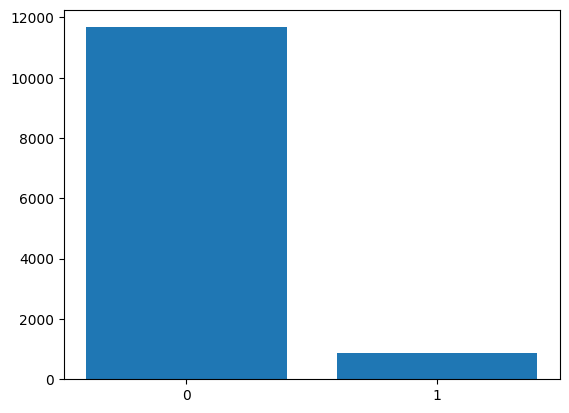

In [14]:
conteo_target = df_credit['SeriousDlqin2yrs'].value_counts()

plt.bar(x= conteo_target.index, height= conteo_target.values)
plt.xticks([0, 1], [0, 1]);

In [15]:
# vemos un claro desnivel, el valor 0 (no deuda en 2 anños) esta claramente sobrerrepresentado en comparacion con el valor 1 (deunda en 2 años)

# quiero ver tambien las distribuciones de las features

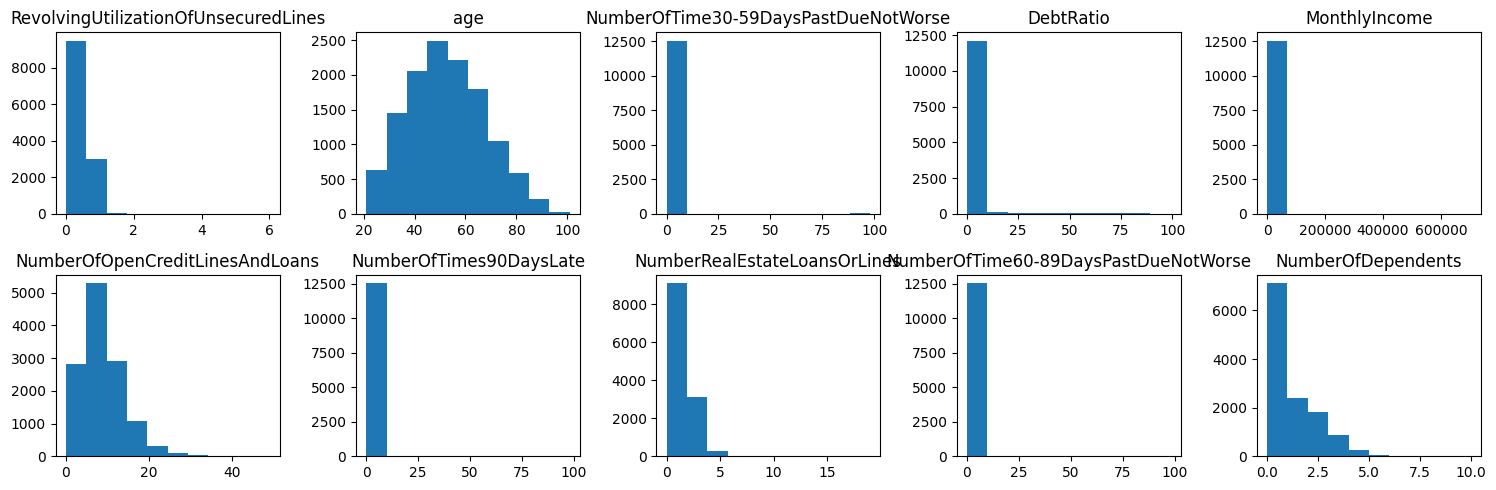

In [16]:
columnas = df_credit.columns.to_list()[1:] # del indice 1 en adelante para dejar fuera el target, que la primera columna
contador = 0

fig, axs = plt.subplots(2, 5, figsize = (15, 5)) 
for fila in range(2):
    for col in range(5):
        axs[fila, col].hist(df_credit[columnas[contador]])
        axs[fila, col].set_title(columnas[contador])
        contador += 1
plt.tight_layout()
plt.show()

# las distribuciones de las variables estan desbalanceadas casi todas, age es la unica que se salva


In [23]:
train_set, test_set = train_test_split(df_credit, test_size= 0.2, random_state= 42)

x_train = train_set.drop(columns= ['SeriousDlqin2yrs'])
y_train = train_set.SeriousDlqin2yrs

x_test = test_set.drop(columns= ['SeriousDlqin2yrs'])
y_test = test_set.SeriousDlqin2yrs

# vamos a estandarizar las features

standar = StandardScaler()

x_train = pd.DataFrame(standar.fit_transform(x_train), columns= x_train.columns, index= x_train.index)
x_test = pd.DataFrame(standar.transform(x_test), columns= x_test.columns, index= x_test.index)

x_train.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04
mean,1.416976e-17,1.494910e-16,-1.133581e-17,-3.542441e-18,-1.346127e-17,-4.746870e-17,2.833952e-18,-4.507756e-17,-2.833952e-17,-1.204430e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-9.032760e-01,-2.058341e+00,-1.010394e-01,-2.054349e-01,-5.486776e-01,-1.646656e+00,-6.368848e-02,-8.706460e-01,-5.639364e-02,-7.271116e-01
25%,-8.196858e-01,-7.306653e-01,-1.010394e-01,-1.896779e-01,-2.631035e-01,-6.758539e-01,-6.368848e-02,-8.706460e-01,-5.639364e-02,-7.271116e-01
50%,-4.566533e-01,-6.682728e-02,-1.010394e-01,-1.721289e-01,-1.126276e-01,-9.337276e-02,-6.368848e-02,2.263001e-03,-5.639364e-02,-7.271116e-01
75%,6.954818e-01,6.633945e-01,-1.010394e-01,-1.495074e-01,9.541391e-02,4.891083e-01,-6.368848e-02,8.751720e-01,-5.639364e-02,1.602236e-01
max,1.362276e+01,3.252363e+00,2.464498e+01,1.073015e+01,5.601061e+01,7.867202e+00,2.480549e+01,1.571463e+01,2.492154e+01,8.146241e+00


### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [26]:
# voy a hacer finalmente un baseline de KNN xq en la teoria decia que era un buen baseline
# utilizare las features estandarizadas porque los valores difieren mucho unas de otras, la edad por ejemplo se mueve an valores muy inferiores a monthlyincome

knn = KNeighborsClassifier(n_neighbors= 100)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [27]:
y_pred_knn = knn.predict(x_test)

print(classification_report(y_test, y_pred_knn))
# el 0 en valor 1 en recall probablemente esta overfiteado y el 1 en este mismo recall es horrible
# seguramente se debe al desnivel en el target, vamos a arreglarlo, tulizaremos un SMOTE para sobremuestrear

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2345
           1       0.60      0.02      0.04       163

    accuracy                           0.94      2508
   macro avg       0.77      0.51      0.50      2508
weighted avg       0.91      0.94      0.91      2508



In [31]:
smoter = SMOTE(random_state= 42)

x_train_smote, y_train_smote = smoter.fit_resample(x_train, y_train)

In [32]:
knn.fit(x_train_smote, y_train_smote)
y_pred_knn = knn.predict(x_test)

print(classification_report(y_test, y_pred_knn))
# el recall a mejorado pero la precision ha empeorado drasticamente

              precision    recall  f1-score   support

           0       0.97      0.75      0.84      2345
           1       0.16      0.67      0.25       163

    accuracy                           0.74      2508
   macro avg       0.56      0.71      0.55      2508
weighted avg       0.92      0.74      0.81      2508



Logisticregressor

In [34]:
log_reg = LogisticRegression()

log_reg.fit(x_train_smote, y_train_smote)
y_pred_log = log_reg.predict(x_test)

print(classification_report(y_test ,y_pred_log))
# es erlativamente mejor que el knn

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      2345
           1       0.18      0.74      0.29       163

    accuracy                           0.77      2508
   macro avg       0.58      0.76      0.58      2508
weighted avg       0.93      0.77      0.82      2508



bagging, randomforest

In [37]:
forest = RandomForestClassifier(n_estimators= 100, criterion= 'gini', max_depth= 10)

forest.fit(x_train_smote, y_train_smote)
y_pred_forest = forest.predict(x_test)
print(classification_report(y_test, y_pred_forest))
# de cara al recall me gusta mas como funciona la regresion logistica, pero esto ahora vamos a optimizarlo a ver que pasa

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2345
           1       0.33      0.48      0.39       163

    accuracy                           0.90      2508
   macro avg       0.65      0.71      0.67      2508
weighted avg       0.92      0.90      0.91      2508



In [42]:
grid_clf_param = {
    'n_estimators': [i for i in range(0, 501, 100)],
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(0, 11)],
    'min_samples_split': [i for i in range(200, 501, 100)],
    'min_samples_leaf': [i for i in range(20, 101, 20)]
}

In [44]:
grid_model = GridSearchCV(
    forest,
    grid_clf_param,
    cv= 5,
    scoring= 'balanced_accuracy'
)

grid_model.fit(x_train_smote, y_train_smote) # ojo que esto a tardao 680min!!

C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3200 fits failed out of a total of 13200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [20, 40, 60, 80, 100],
                         'min_samples_split': [200, 300, 400, 500],
                         'n_estimators': [0, 100, 200, 300, 400, 500]},
             scoring='balanced_accuracy')

In [46]:
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 200,
 'n_estimators': 100}

In [47]:
grid_model.best_score_

0.8770920579640181

In [48]:
opt_forest = grid_model.best_estimator_

y_pred_opt_for = opt_forest.predict(x_test)

print(classification_report(y_test, y_pred_opt_for))

# valiente fracaso, es cierto que ha optimizado el random forest original que teniamos de cara al recall, pero  siguen si gustarme los resultados, el regresor logistico arrojaba mejores resultados

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2345
           1       0.28      0.58      0.38       163

    accuracy                           0.88      2508
   macro avg       0.63      0.74      0.66      2508
weighted avg       0.92      0.88      0.90      2508



boosting, xgboost

In [55]:
xgb_clas = xgboost.XGBClassifier(random_state=42)

xgb_clas.fit(x_train_smote, y_train_smote)

y_pred_xgb = xgb_clas.predict(x_test)
print(classification_report(y_test, y_pred_xgb))
# solo ha cogido el 29% de los positivos? que mal

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2345
           1       0.48      0.29      0.36       163

    accuracy                           0.93      2508
   macro avg       0.71      0.64      0.66      2508
weighted avg       0.92      0.93      0.93      2508



In [57]:
x = xgb_clas.predict(x_train_smote)
print(classification_report(y_train_smote, x))

# ooooooook, esta sobre-ajusado

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9328
           1       1.00      0.97      0.99      9328

    accuracy                           0.99     18656
   macro avg       0.99      0.99      0.99     18656
weighted avg       0.99      0.99      0.99     18656



me voy a quedar con el modelo de regresion logistica que es el que mas me han gustado los resultados. Sin embargo no he aplicado seleccion de caracteristaicas, asi que a continuacion vamos a aplicarle Lasso para cargarnos las features que me sobren a ver si mejoramos los resultados

In [92]:
log_reg_lasso = LogisticRegression(penalty= 'l1', max_iter= 1000)

param_lasso = {
    'C': [i for i in np.arange(0.1, 1.1, 0.1)],
    'solver': ['liblinear', 'saga']
} # este no es exactamente el mismo procedimiento que vimos en los videos pero me gusta como aplica, el parametro c aplica un grado de penalizacion (no necesariamente entre 0 y 1) y solver el metodo de optimizacion del m odelo

grid_model_lasso = GridSearchCV(log_reg_lasso, param_lasso, cv= 5, scoring= 'balanced_accuracy')

In [93]:
grid_model_lasso.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, penalty='l1'),
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,
                               0.7000000000000001, 0.8, 0.9, 1.0],
                         'solver': ['liblinear', 'saga']},
             scoring='balanced_accuracy')

In [94]:
grid_model_lasso.best_params_

{'C': 0.4, 'solver': 'liblinear'}

In [95]:
log_reg_lasso = grid_model_lasso.best_estimator_

y_pred_log_lasso = log_reg_lasso.predict(x_test)

print(classification_report(y_test, y_pred_log_lasso)) # informe de la regresion logistica regularizada y optimizada

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      2345
           1       0.18      0.74      0.29       163

    accuracy                           0.77      2508
   macro avg       0.58      0.76      0.58      2508
weighted avg       0.93      0.77      0.82      2508



In [80]:
print(classification_report(y_test, y_pred_log)) # informe de la regresion logistica original

# pues estan exactamente igual

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      2345
           1       0.18      0.74      0.29       163

    accuracy                           0.77      2508
   macro avg       0.58      0.76      0.58      2508
weighted avg       0.93      0.77      0.82      2508



me voy a quedar con el modelo de regresion logistica, aunque no me convencen plenamente los resultados, un 74% de recall no me parece una maravilla 

* dato: durante todo el ejercicio hemos buscado optimizar el recall obviando la precision, acorde al modelo de negocio parece mas interesante __predecir la mayor cantidad de deudores de todos los deudores reales (recall)__
  vs cuantos deudores eran ciertos de los predichos (precision)

probablemente deberia haber seleccionado las features al principio y no confiar en la seleccion de los arboles de decision o el lasso.

analisis de errores

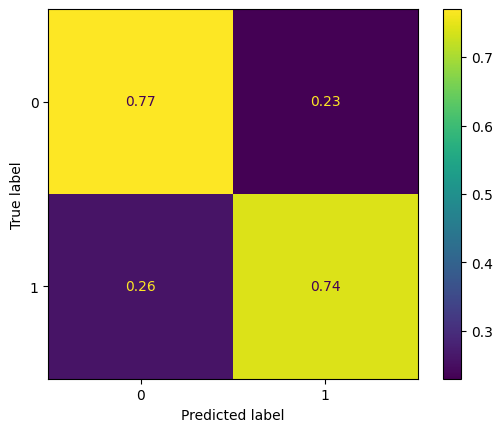

In [97]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, normalize= "true")

In [ ]:
# de los deudores predecimos a una cantidad aceptable, 74% frente al 26% que se nos escapan

# a un 23% de clientes pagadores los clasificamos como deudores, es casi una cuarta parte de los clientes, quizas sea un porcentaje un tanto alto, pues consideramos mallos clientes a un cuarto del total y eso no puede ser 
# un mal trato al cliente